<a href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/Adaboost%26Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# 模式识别·第六次作业·Adaboost&Random_Forest

#### 纪泽西 17375338

#### Last Modified:19th,April,2020

</center>

<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/Adaboost&Random_Forest.ipynb"> 
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" /><br>Run in Google Colab</a></td>
</table>


## Part1: 导入库文件及数据集

#### 如需在其他环境运行需改变数据集所在路径

In [41]:
%tensorflow_version 2.x
import tensorflow as tf
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from time import *

import os
import scipy.io as sio

%cd /content/drive/My Drive/Pattern Recognition/Dataset/cell_dataset

/content/drive/My Drive/Pattern Recognition/Dataset/cell_dataset


In [0]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [14]:
print(x_train.shape,x_test.shape)
print(np.unique(y_test))
print(np.bincount(y_test.astype(int)))

(14536, 51, 51) (6229, 51, 51)
[0. 1. 2.]
[ 683 2439 3107]


## Part2:数据预处理

#### 可视化展现数据集特征

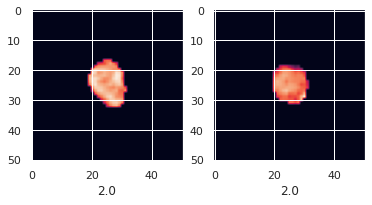

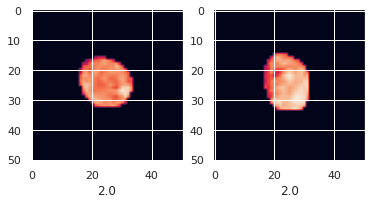

In [10]:
for i in range(10,12):
  plt.subplot(1,2,1)
  plt.imshow(x_test[i,:,:])
  plt.xlabel(y_test[i])
  plt.subplot(1,2,2)
  plt.imshow(x_train[i,:,:])
  plt.xlabel(y_train[i])
  plt.show()



In [15]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_train.shape,x_test.shape)

(14536, 2601) (6229, 2601)


## Part3:模型建立


#### AdaBoost算法

In [0]:
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    acc = accuracy_score(ytest, yhat)
    print(f"Sum Axis-1 as Classification accuracy: {acc}")

In [0]:
abc=AdaBoostClassifier(n_estimators=100)

Time Usage: 79.12906050682068 s
0.6919248675549847
Sum Axis-1 as Classification accuracy: 0.6919248675549847


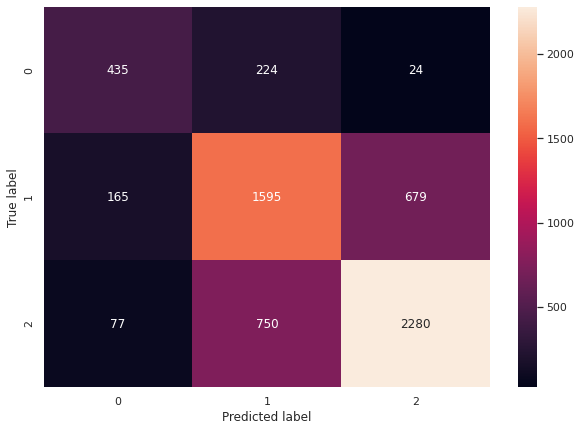

In [37]:
st=time()
abc.fit(x_train,y_train)
et=time()
print("Time Usage:",et-st,"s")
yhat_abc=abc.predict(x_test)
print(abc.score(x_test,y_test))
draw_confusionmatrix(y_test,yhat_abc)

#### GBTD 算法

In [0]:
gbc=GradientBoostingClassifier(n_estimators=100)

Time Usage: 488.30764532089233
Sum Axis-1 as Classification accuracy: 0.7283673141756302


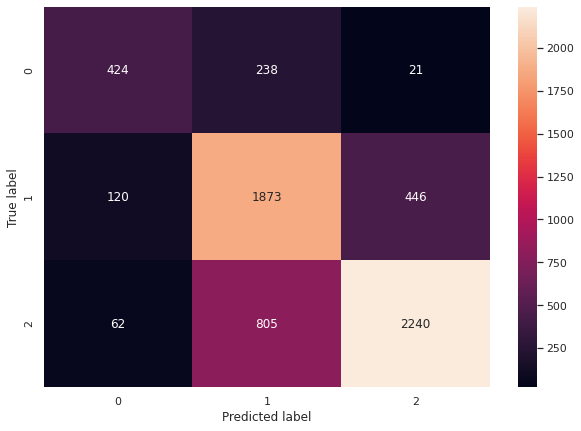

In [39]:
st=time()
gbc.fit(x_train,y_train)
et=time()
print("Time Usage:",et-st)
yhat_gbc=gbc.predict(x_test)
draw_confusionmatrix(y_test,yhat_gbc)

### Random Forest 算法

In [43]:
for i in range(10,200,10):
    rdc = RandomForestClassifier(n_estimators=i)
    rdc.fit(x_train,y_train)
    yhat_rdc = []
    yhat_i = rdc.predict(x_test)
    yhat_rdc = yhat_rdc.append(yhat_i)
    acc_rdc = accuracy_score(y_test,yhat_i)
    print("n_estimators = %d, random forest accuracy:%f" %(i,acc_rdc))    

n_estimators = 10, random forest accuracy:0.701236
n_estimators = 20, random forest accuracy:0.722588
n_estimators = 30, random forest accuracy:0.725799
n_estimators = 40, random forest accuracy:0.729652
n_estimators = 50, random forest accuracy:0.732702
n_estimators = 60, random forest accuracy:0.727404
n_estimators = 70, random forest accuracy:0.729652
n_estimators = 80, random forest accuracy:0.730775
n_estimators = 90, random forest accuracy:0.739766
n_estimators = 100, random forest accuracy:0.736073
n_estimators = 110, random forest accuracy:0.734468
n_estimators = 120, random forest accuracy:0.735592
n_estimators = 130, random forest accuracy:0.735913
n_estimators = 140, random forest accuracy:0.734789
n_estimators = 150, random forest accuracy:0.734628
n_estimators = 160, random forest accuracy:0.735431
n_estimators = 170, random forest accuracy:0.735752
n_estimators = 180, random forest accuracy:0.735592
n_estimators = 190, random forest accuracy:0.734468


Sum Axis-1 as Classification accuracy: 0.7367153636217691


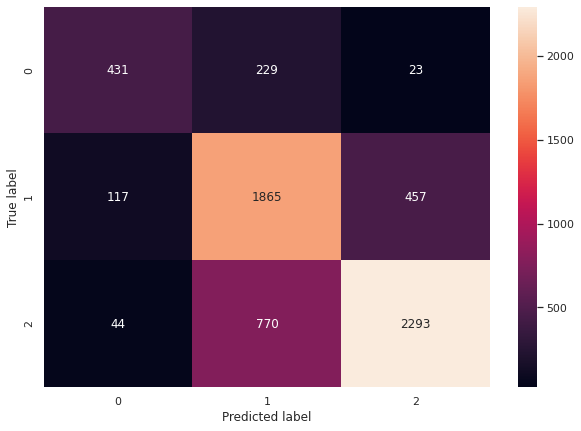

In [49]:
rdc = RandomForestClassifier(n_estimators=80)
rdc.fit(x_train,y_train)
yhat_rdc = rdc.predict(x_test)
draw_confusionmatrix(y_test,yhat_rdc)

总体而言，针对细胞核分类，在集成学习方法中，随机森林获得比Adaboost/GBTD方法更好的性能。如需获得更好的性能，可以考虑对2601维数据进行特征提取。